In [92]:
import pymongo
import pandas as pd
import osmnx as ox
import geopandas as gpd
from sklearn.cluster import OPTICS

In [20]:
client = pymongo.MongoClient("mongodb://localhost:27017/accidents")

In [ ]:
def export_accidents(region_name):
    client = pymongo.MongoClient("mongodb://localhost:27017/accidents")
    accidents_df = pd.DataFrame(list(client['accidents']['accidents'].find({"region_name": region_name})))
    return accidents_df


In [ ]:
def preprocess_data(accidents_df):
    accidents_df = accidents_df.loc[(accidents_df.latitude != '') & (accidents_df.longitude != '') & (accidents_df.mun_name == "г.Ухта")]
    accidents_df['longitude'] = accidents_df['longitude'].astype("float")
    accidents_df['latitude'] = accidents_df['latitude'].astype("float")
    accidents_df = gpd.GeoDataFrame(accidents_df, geometry=gpd.points_from_xy(x=accidents_df['longitude'], y=accidents_df['latitude']))
    spb_boundaries = ox.geocode_to_gdf(f"{region_name}, Россия").geometry.iloc[0]

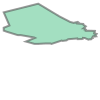

In [110]:
spb_accidents_df = pd.DataFrame(list(client['accidents']['accidents'].find({"region_name": "Республика Коми"})))
spb_accidents_df = spb_accidents_df.loc[(spb_accidents_df.latitude != '') & (spb_accidents_df.longitude != '') & (spb_accidents_df.mun_name == "г.Ухта")]
spb_accidents_df['longitude'] = spb_accidents_df['longitude'].astype("float")
spb_accidents_df['latitude'] = spb_accidents_df['latitude'].astype("float")
spb_accidents_gdf = gpd.GeoDataFrame(spb_accidents_df, geometry=gpd.points_from_xy(x=spb_accidents_df['longitude'], y=spb_accidents_df['latitude']))
spb_boundaries = ox.geocode_to_gdf("Ухта, Россия").geometry.iloc[0]
spb_accidents_gdf['spb'] = spb_accidents_gdf.within(spb_boundaries)
spb_accidents_gdf = spb_accidents_gdf.loc[spb_accidents_gdf.spb == True]
spb_boundaries

In [111]:
spb_accidents_gdf

_id      region_name mun_name            datetime  \
251   6667572e459171df3c7ad889  Республика Коми   г.Ухта 2015-12-23 11:34:00   
253   6667572e459171df3c7ad88b  Республика Коми   г.Ухта 2015-12-20 14:40:00   
254   6667572e459171df3c7ad88c  Республика Коми   г.Ухта 2015-12-16 19:26:00   
255   6667572e459171df3c7ad88d  Республика Коми   г.Ухта 2015-12-14 09:00:00   
257   6667572e459171df3c7ad88f  Республика Коми   г.Ухта 2015-12-12 13:30:00   
...                        ...              ...      ...                 ...   
9061  66675760459171df3c8fde32  Республика Коми   г.Ухта 2024-01-15 17:46:00   
9064  66675760459171df3c8fde35  Республика Коми   г.Ухта 2024-01-10 13:07:00   
9065  66675760459171df3c8fde36  Республика Коми   г.Ухта 2024-01-09 19:30:00   
9066  66675760459171df3c8fde37  Республика Коми   г.Ухта 2024-01-03 20:16:00   
9067  66675760459171df3c8fde38  Республика Коми   г.Ухта 2024-01-01 19:14:00   

                      type  dead_number  injured_number  car_number  \
251   Наезд на препятствие            0               1           1   
253           Столкновение            0               1           2   
254      Наезд на пешехода            0               1           1   
255      Наезд на пешехода            0               1           1   
257      Наезд на пешехода            0               1           1   
...                    ...          ...             ...         ...   
9061     Наезд на пешехода            0               1           1   
9064          Столкновение            0               1           2   
9065     Наезд на пешехода            0               1           1   
9066          Столкновение            0               1           3   
9067     Наезд на пешехода            0               1           1   

      member_number       road_network_disadvantages    driving_mode_factors  \
251               2                 [Не установлены]  [Сведения отсутствуют]   
253               2                 [Не установлены]  [Сведения отсутствуют]   
254               2                 [Не установлены]  [Сведения отсутствуют]   
255               2  [Недостатки зимнего содержания]  [Сведения отсутствуют]   
257               2                 [Не установлены]  [Сведения отсутствуют]   
...             ...                              ...                     ...   
9061              2                 [Не установлены]  [Сведения отсутствуют]   
9064              2  [Недостатки зимнего содержания]  [Сведения отсутствуют]   
9065              2                 [Не установлены]  [Сведения отсутствуют]   
9066              3                 [Не установлены]  [Сведения отсутствуют]   
9067              2  [Недостатки зимнего содержания]  [Сведения отсутствуют]   

                            weather  \
251                      [Пасмурно]   
253                          [Ясно]   
254                      [Пасмурно]   
255                      [Пасмурно]   
257                      [Пасмурно]   
...                             ...   
9061                     [Пасмурно]   
9064                     [Пасмурно]   
9065                     [Пасмурно]   
9066                         [Ясно]   
9067  [Ясно, Температура ниже -30С]   

                                roadway_condition  \
251                            Со снежным накатом   
253                            Со снежным накатом   
254   Обработанное противогололедными материалами   
255                            Со снежным накатом   
257                            Со снежным накатом   
...                                           ...   
9061  Обработанное противогололедными материалами   
9064  Обработанное противогололедными материалами   
9065                                        Сухое   
9066  Обработанное противогололедными материалами   
9067  Обработанное противогололедными материалами   

                                         lighting  longitude   latitude  \
251                           Светлое время суток  53.770000  63.560300

In [86]:
spb_accidents_gdf.to_csv("spb.csv")

In [77]:
spb_accidents_df.dropna(subset=['longitude'])

_id         region_name              mun_name  \
0      6667572f459171df3c7c17ea  г. Санкт-Петербург     Центральный район   
1      6667572f459171df3c7c17eb  г. Санкт-Петербург     Центральный район   
2      6667572f459171df3c7c17ec  г. Санкт-Петербург     Центральный район   
3      6667572f459171df3c7c17ed  г. Санкт-Петербург     Центральный район   
4      6667572f459171df3c7c17ee  г. Санкт-Петербург     Центральный район   
...                         ...                 ...                   ...   
52660  66675760459171df3c902b33  г. Санкт-Петербург  Адмиралтейский район   
52661  66675760459171df3c902b34  г. Санкт-Петербург  Адмиралтейский район   
52662  66675760459171df3c902b35  г. Санкт-Петербург  Адмиралтейский район   
52663  66675760459171df3c902b36  г. Санкт-Петербург  Адмиралтейский район   
52664  66675760459171df3c902b37  г. Санкт-Петербург  Адмиралтейский район   

                 datetime                    type  dead_number  \
0     2015-12-31 11:10:00            Столкновение            0   
1     2015-12-30 23:53:00            Столкновение            0   
2     2015-12-30 02:50:00     Наезд на стоящее ТС            0   
3     2015-12-29 23:08:00       Наезд на пешехода            0   
4     2015-12-29 15:00:00       Наезд на пешехода            0   
...                   ...                     ...          ...   
52660 2024-01-12 07:52:00       Наезд на пешехода            0   
52661 2024-01-12 14:40:00       Падение пассажира            0   
52662 2024-01-12 11:45:00  Наезд на велосипедиста            0   
52663 2024-01-11 08:23:00       Наезд на пешехода            0   
52664 2024-01-10 11:05:00       Наезд на пешехода            0   

       injured_number  car_number  member_number  \
0                   1           2              3   
1                   1           2              2   
2                   2           2              3   
3                   1           1              2   
4                   1           1              2   
...               ...         ...            ...   
52660               1           1              2   
52661               1           1              2   
52662               1           2              2   
52663               1           1              2   
52664               1           1              2   

                              road_network_disadvantages  \
0                                       [Не установлены]   
1                                       [Не установлены]   
2                                       [Не установлены]   
3                                       [Не установлены]   
4      [Отсутствие, плохая различимость горизонтально...   
...                                                  ...   
52660  [Недостатки зимнего содержания, Отсутствие пеш...   
52661                    [Недостатки зимнего содержания]   
52662                    [Недостатки зимнего содержания]   
52663                    [Недостатки зимнего содержания]   
52664  [Недостатки зимнего содержания, Отсутствие дор...   

         driving_mode_factors     weather roadway_condition  \
0      [Сведения отсутствуют]  [Пасмурно]             Сухое   
1      [Сведения отсутствуют]      [Ясно]             Сухое   
2      [Сведения отсутствуют]  [Пасмурно]        Гололедица   
3      [Сведения отсутствуют]  [Пасмурно]             Сухое   
4      [Сведения отсутствуют]      [Ясно]            Мокрое   
...                       ...         ...               ...   
52660  [Сведения отсутствуют]  [Пасмурно]       Заснеженное   
52661  [Сведения отсутствуют]  [Пасмурно]      Загрязненное   
52662  [Сведения отсутствуют]  [Пасмурно]       Заснеженное   
52663  [Сведения отсутствуют]  [Снегопад]       Заснеженное   
52664  [Сведения отсутствуют]  [Пасмурно]            Мокрое   

                                       lighting longitude latitude  \
0                           Светлое время суток   30.3483  59.9375   
1                                       Сумерки   30.4694  59.8617 

In [112]:
optics_clusterer = OPTICS()

In [118]:
clusters = optics_clusterer.fit_predict(spb_accidents_gdf[['latitude', 'longitude']])

In [120]:
spb_accidents_gdf['cluster'] = clusters
spb_accidents_gdf.to_csv('clusters.csv')

In [123]:
spb_accidents_gdf.loc[spb_accidents_gdf.cluster != -1].to_csv('clusters.csv')

In [141]:
spb_accidents_gdf = spb_accidents_gdf.loc[spb_accidents_gdf.cluster != -1].to_crs(spb_accidents_gdf.estimate_utm_crs())
spb_accidents_gdf.groupby('cluster').apply(lambda x: x.dissolve().concave_hull()).to_csv('pipi.csv')

AttributeError: 'GeoSeries' object has no attribute 'dissolve'

In [134]:
spb_accidents_gdf

_id      region_name mun_name            datetime  \
251   6667572e459171df3c7ad889  Республика Коми   г.Ухта 2015-12-23 11:34:00   
254   6667572e459171df3c7ad88c  Республика Коми   г.Ухта 2015-12-16 19:26:00   
255   6667572e459171df3c7ad88d  Республика Коми   г.Ухта 2015-12-14 09:00:00   
257   6667572e459171df3c7ad88f  Республика Коми   г.Ухта 2015-12-12 13:30:00   
262   6667572e459171df3c7ad894  Республика Коми   г.Ухта 2015-12-06 15:42:00   
...                        ...              ...      ...                 ...   
9060  66675760459171df3c8fde31  Республика Коми   г.Ухта 2024-01-15 20:20:00   
9064  66675760459171df3c8fde35  Республика Коми   г.Ухта 2024-01-10 13:07:00   
9065  66675760459171df3c8fde36  Республика Коми   г.Ухта 2024-01-09 19:30:00   
9066  66675760459171df3c8fde37  Республика Коми   г.Ухта 2024-01-03 20:16:00   
9067  66675760459171df3c8fde38  Республика Коми   г.Ухта 2024-01-01 19:14:00   

                      type  dead_number  injured_number  car_number  \
251   Наезд на препятствие            0               1           1   
254      Наезд на пешехода            0               1           1   
255      Наезд на пешехода            0               1           1   
257      Наезд на пешехода            0               1           1   
262           Столкновение            0               1           3   
...                    ...          ...             ...         ...   
9060          Столкновение            0               2           2   
9064          Столкновение            0               1           2   
9065     Наезд на пешехода            0               1           1   
9066          Столкновение            0               1           3   
9067     Наезд на пешехода            0               1           1   

      member_number                         road_network_disadvantages  \
251               2                                   [Не установлены]   
254               2                                   [Не установлены]   
255               2                    [Недостатки зимнего содержания]   
257               2                                   [Не установлены]   
262               3                                   [Не установлены]   
...             ...                                                ...   
9060              2  [Недостатки зимнего содержания, Недостаточное ...   
9064              2                    [Недостатки зимнего содержания]   
9065              2                                   [Не установлены]   
9066              3                                   [Не установлены]   
9067              2                    [Недостатки зимнего содержания]   

        driving_mode_factors                        weather  \
251   [Сведения отсутствуют]                     [Пасмурно]   
254   [Сведения отсутствуют]                     [Пасмурно]   
255   [Сведения отсутствуют]                     [Пасмурно]   
257   [Сведения отсутствуют]                     [Пасмурно]   
262   [Сведения отсутствуют]                     [Пасмурно]   
...                      ...                            ...   
9060  [Сведения отсутствуют]                     [Пасмурно]   
9064  [Сведения отсутствуют]                     [Пасмурно]   
9065  [Сведения отсутствуют]                     [Пасмурно]   
9066  [Сведения отсутствуют]                         [Ясно]   
9067  [Сведения отсутствуют]  [Ясно, Температура ниже -30С]   

                                roadway_condition  \
251                            Со снежным накатом   
254   Обработанное противогололедными материалами   
255                            Со снежным накатом   
257                            Со снежным накатом   
262   Обработанное противогололедными материалами   
...                                           ...   
9060  Обработанное противогололедными материалами   
9064  Обработанное противогололедными материалами   
9065                                        Сухое   
9066  Обработанное противогололедными

In [171]:
regions_boundaries = gpd.GeoDataFrame()
import json
with open("latest_reg_mun_names.json", encoding='utf-8') as file:
    regions = json.load(file)
region_names: list[str] = [region['name'] for region in regions]
for region_name in region_names:
    if region_name == "Ханты-Мансийский АО":
        region_name = "Ханты-Мансийский автономный округ - Югра"
    region_name = region_name.replace("г.", '')
    region_name = region_name.replace("АО", 'автономный округ')
    regions_boundaries = pd.concat([regions_boundaries, ox.geocode_to_gdf(f"{region_name.replace('АО', 'автономный округ')}")])


In [172]:
regions_boundaries.to_csv("boundaries.csv")